## Descriptive Analysis

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import geopandas as gpd

In [2]:
df = pd.read_csv("training_data.csv")

In [3]:
df.columns

Index(['county', 'cases', 'deaths', 'date_index_converted',
       'county_data_length', 'core_jaccard', 'core_cosine',
       'core_intersection', 'social_jaccard', 'politics_jaccard',
       ...
       'labor_force_rate', 'unemployment_rate', 'median_housing_cost',
       'median_household_earnings', 'median_worker_earnings',
       'percent_insured', 'percent_married', 'poverty_rate',
       'median_property_value', 'percent_white'],
      dtype='object', length=144)

In [4]:
df

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.000000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.000370,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.000000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Summit,105,0,day_81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,...,64.2,6.4,859,50765,28345,93.2,47.3,13.6,137000,0.791435
3137,Fayette,0,0,day_55,28,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
3138,Clark,147,0,day_106,929,0.000013,0.000105,0.001076,0.000009,0.000012,...,60.6,7.7,736,43625,25300,92.7,48.1,16.6,107300,0.865754
3139,Logan,0,0,day_1,144,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.5,5.8,766,49783,28346,90.7,55.2,13.7,127200,0.949363


## Question 2
Find the average values for all the topic awareness variables. Create a bar chart that shows the
average normalized Jaccard similarity-based awareness values for all different types of awareness
topics listed above. Order the bars from the biggest to the smallest. Summarize your observations
in around 100 words. [4 points]

In [5]:
#Average Value for all the topic awareness variabless
topic_awareness_var = df.drop(columns=[
    "cases",
    "county",
    "county_data_length",
    "date_index_converted",
    "deaths",
    "labor_force_rate",
    "median_household_earnings",
    "median_housing_cost",
    "median_property_value",
    "median_worker_earnings",
    "percent_25_34",
    "percent_highschool",
    "percent_insured",
    "percent_married",
    "percent_white",
    "poverty_rate",
    "total_pop",
    "unemployment_rate"
])
    


In [6]:
# Average Value of all the topic awareness
topic_awareness_mean=topic_awareness_var.mean()
topic_awareness_mean

core_jaccard                                        0.000031
core_cosine                                         0.000188
core_intersection                                   0.002652
social_jaccard                                      0.000026
politics_jaccard                                    0.000018
                                                      ...   
entertainment_intersection_normalized               0.016326
politics_republican_hate_intersection_normalized    0.002337
politics_democratic_hate_intersection_normalized    0.002092
health_intersection_normalized                      0.000305
illness_intersection_normalized                     0.014423
Length: 126, dtype: float64

In [7]:
# Average value of all the variables that has to do with jaccard normalized
pattern = "jaccard_normalized"
jaccard_normalized_columns = df.filter(like=pattern).columns
jaccard_normalized_df = df[jaccard_normalized_columns]
jaccard_normalized_mean = jaccard_normalized_df.mean()
jaccard_normalized_mean_df = jaccard_normalized_mean.to_frame()
jaccard_normalized_mean_df = jaccard_normalized_mean_df.reset_index()
jaccard_normalized_mean_df.columns = ['jaccard_normalized_var','mean_value']

In [8]:
jaccard_normalized_mean_df.sort_values(by='mean_value',ascending=False,inplace=True)
jaccard_normalized_mean_df

,jaccard_normalized_var,mean_value
4,sports_jaccard_normalized,0.016608
16,entertainment_jaccard_normalized,0.016255
20,illness_jaccard_normalized,0.014464
0,core_jaccard_normalized,0.013087
10,education_jaccard_normalized,0.007939
12,religion_jaccard_normalized,0.007208
13,social_jaccard_normalized,0.006125
3,economy_jaccard_normalized,0.005675
8,politics_democratic_love_jaccard_normalized,0.005499
14,politics_republican_love_jaccard_normalized,0.004496


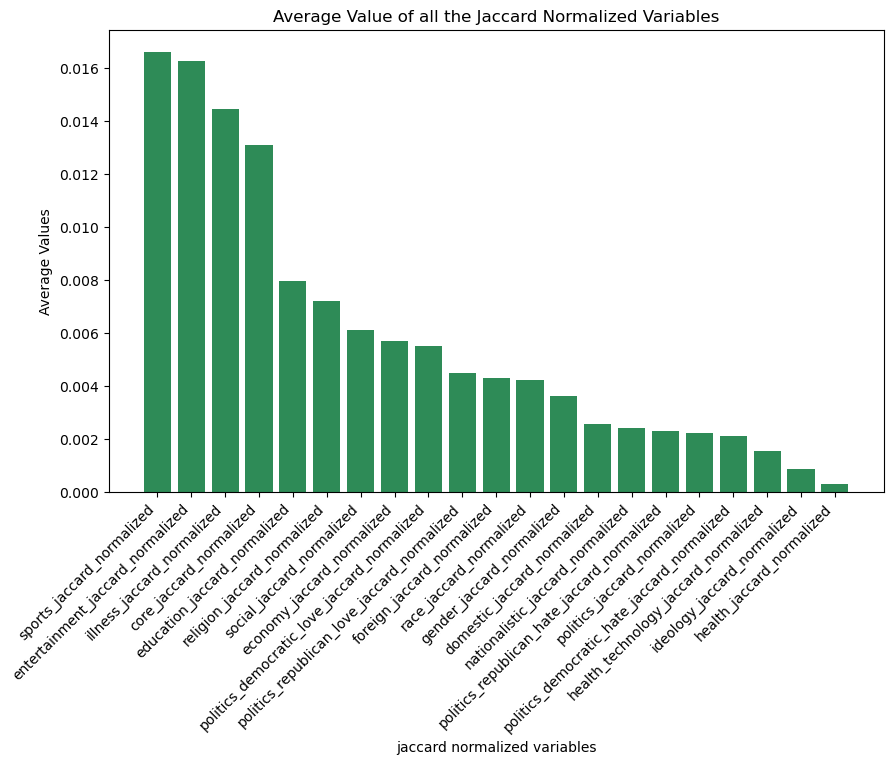

In [9]:
#Plot
plt.figure(figsize=(10,6))
plt.bar(jaccard_normalized_mean_df['jaccard_normalized_var'],jaccard_normalized_mean_df['mean_value'],color = 'seagreen')
plt.xlabel("jaccard normalized variables")
plt.ylabel("Average Values")
plt.title("Average Value of all the Jaccard Normalized Variables")
plt.xticks(rotation= 45, ha='right')
plt.show()

## Plot Summary
This chart offers a snapshot of the collective conversations during the pandemic through the lens of social media. Interestingly, sports discussions were at the forefront, likely a reflection of the pandemic's disruption of athletic events. Close behind, entertainment and general wellness topics also commanded attention, highlighting the effect of the pandemic on daily life and health concerns. Conversations on education and religion were also prominent, pointing to societal concern over how the pandemic was affecting academic institutions and religious practices. Political discussions featured to a lesser degree. Notably, in-depth health technology and ideological topics were less prevalent, hinting at their narrower reach in public discussions. This visualization paints a picture of where our societal focus lay during a time of global crisis.

## Question C

Focus on the core_jaccard_normalized variable. Create a bar chart that shows the
aggregated mean awareness value for each county. Order the bars from the biggest to the
smallest. Which county has the highest awareness? Summarize your observations in around 100
words. [4 points]

In [10]:
core_jaccard_normalized_county = df[['county','core_jaccard_normalized']]
core_jaccard_normalized_county_agg=(core_jaccard_normalized_county
                                    .groupby('county')
                                    .aggregate({'core_jaccard_normalized': 'mean'})
                                    )
core_jaccard_normalized_county_agg = core_jaccard_normalized_county_agg.reset_index()
core_jaccard_normalized_county_agg.sort_values(by='core_jaccard_normalized',ascending=False, inplace=True)
core_jaccard_normalized_county_agg


,county,core_jaccard_normalized
20,Delaware,0.038117
69,Richland,0.036633
63,Perry,0.032577
12,Clermont,0.031629
51,Medina,0.028693
...,...,...
36,Hocking,0.000000
37,Holmes,0.000000
10,Champaign,0.000000
35,Highland,0.000000


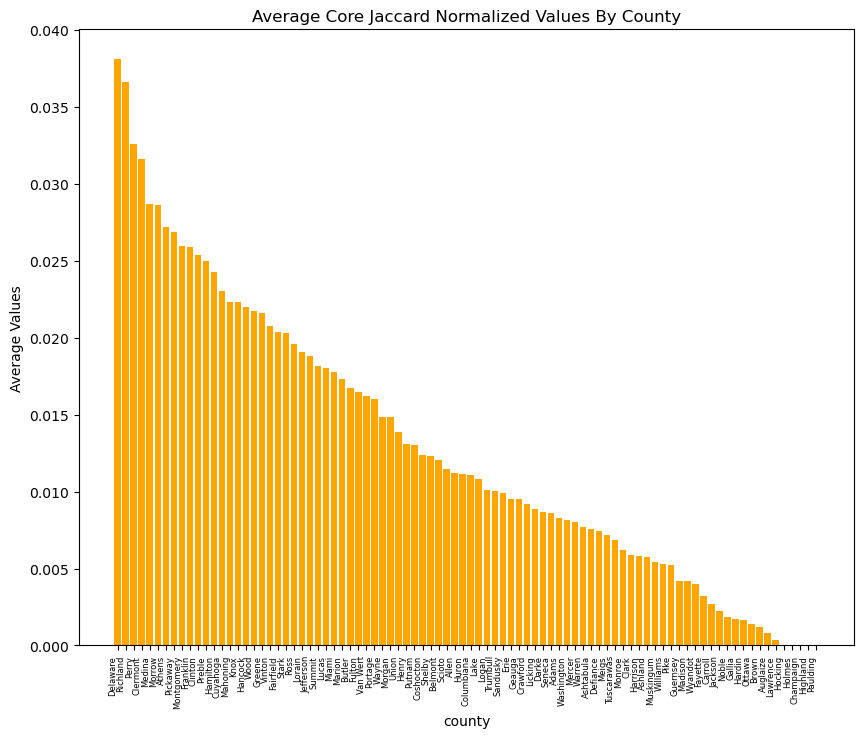

In [11]:
#Plot
plt.figure(figsize=(10,8))
plt.bar(core_jaccard_normalized_county_agg['county'],core_jaccard_normalized_county_agg['core_jaccard_normalized'],color = 'orange')
plt.xlabel("county")
plt.ylabel("Average Values")
plt.title("Average Core Jaccard Normalized Values By County")
plt.xticks(rotation= 90, ha='right')
plt.tick_params(axis='x', labelsize=6)
plt.show()

## Plot Summary
The bar chart reflects varying levels of engagement in Covid-19 related discussions across different counties. High average core Jaccard normalized values in certain counties suggest intense discussions or awareness about Covid-19, possibly driven by local outbreaks, policies, or community initiatives. The notable decline in these values across the counties indicates that this engagement was not uniform; some areas had significantly lower discussion levels. This disparity may point to differences in how the pandemic affected or was perceived in various regions, the effectiveness of communication strategies, or the presence of other local issues that dominated public attention. The chart essentially captures the heterogeneity in public engagement with the pandemic across the counties.

## Question D
Create two county-level maps of Ohio (an example is provided in the first page of the
assignment). Using colors, show the number of average Covid-19 cases per capita and the
number of average Covid-19 deaths per capita by county. What are the top-5 counties with high
number of per capita cases and per capita number of deaths? Summarize your observations in
around 100 words. [4 points]

In [12]:
# Average No. of Covid Cases in the county of Ohio
avg_covid_county = df[['county','cases']]
avg_covid_county_agg = avg_covid_county.groupby('county').aggregate({'cases':'mean'})
avg_covid_county_agg = avg_covid_county_agg.reset_index()
avg_covid_county_agg

,county,cases
0,Adams,6.027778
1,Allen,82.515152
2,Ashland,6.658537
3,Ashtabula,79.648649
4,Athens,7.000000
...,...,...
83,Washington,82.600000
84,Wayne,92.361111
85,Williams,5.558824
86,Wood,108.294118


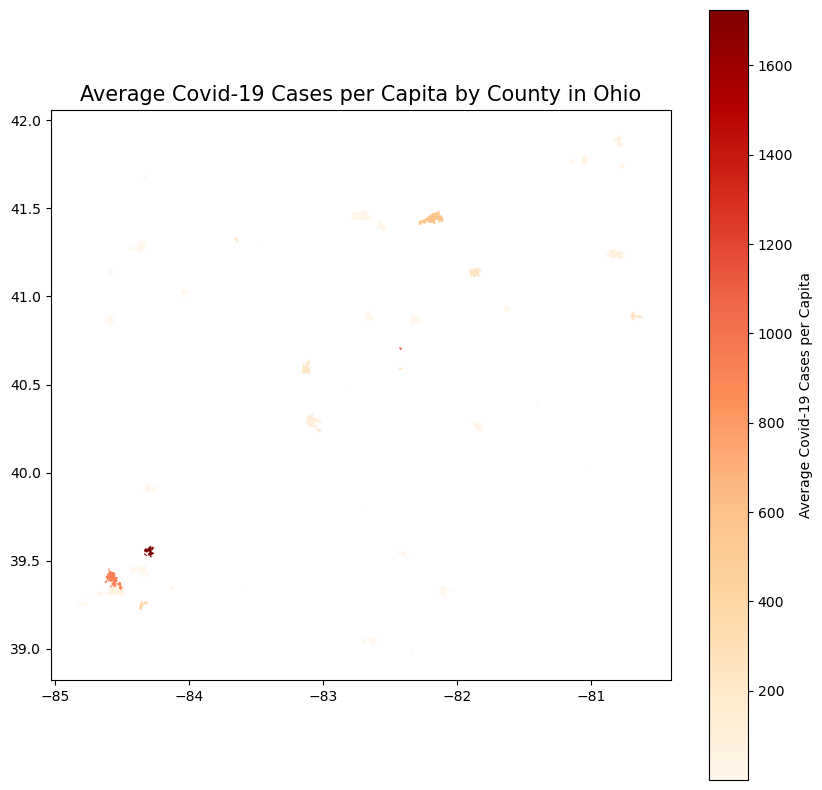

In [13]:
#county level map of Ohio for Avg. Covid cases

# Label Encoding

ohio_filepath = "/Users/bablidey/Documents/GitHub/Covid-19-Awareness-Cases-in-Ohio/tl_2019_39_place/tl_2019_39_place.shp"
ohio_county = gpd.read_file(ohio_filepath)
merged_data = ohio_county.merge(avg_covid_county_agg, left_on="NAME", right_on='county')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='cases', ax=ax, legend=True,
                 legend_kwds={'label': "Average Covid-19 Cases per Capita"},
                 cmap='OrRd')
ax.set_title('Average Covid-19 Cases per Capita by County in Ohio', fontsize=15)
plt.show()
